In [1]:
#reading data from csv file
import pandas as pd
df = pd.read_csv("my_playlist_sentiment_clean.csv")
df = df.drop_duplicates(subset = "track_name")
df = df.reset_index(drop = True)
df.head()


,artist_name,artist_id,track_name,track_id,lyric,sentiment,sentiment_score
0,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Locked out of Heaven,3w3y8KPTfNeOKPiqUTakBh,"One, two, one, two, three\nOh, yeah, yeah\nOh,...",Positive,99.44
1,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,There's Nothing Holdin' Me Back,7JJmb5XwzOO8jgpou264Ml,I wanna follow where she goes\nI think about h...,Positive,49.39
2,a-ha,2jzc5TC5TVFLXQlBNiIUzE,Take on Me,2WfaOiMkCvy7F5fcp2zZ8L,We're talking away\nI don't know what I'm to s...,Positive,63.69
3,James Arthur,4IWBUUAFIplrNtaOHcJPRM,Say You Won't Let Go,5uCax9HTNlzGybIStD3vDh,I met you in the dark\nYou lit me up\nYou made...,Positive,73.51
4,The Chainsmokers,69GGBxA162lTqCwzJG5jLp,Something Just Like This,6RUKPb4LETWmmr3iAEQktW,I've been reading books of old\nThe legends an...,Positive,94.94


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
def sentiment():
    sentiment_diff = []
    artist = input("Enter artist name: ")
    if artist in df["artist_name"].values:
        song = input("Enter song name: ")
        if song in df["track_name"].values:
            sentiment = df[df["track_name"] == song]["sentiment_score"].values[0]
            ind = df[df["track_name"] == song]["sentiment_score"].index.values[0]
            for val,ind2 in zip(df["sentiment_score"].values, df["sentiment_score"].index):
                if val != sentiment and ind2 != ind:
                    sentiment_diff.append(round(abs(sentiment - val),4))
            sentiment_diff_ord = sorted(sentiment_diff)
            sentiment_diff_ord = list(dict.fromkeys(sentiment_diff_ord))
            indexes = [sentiment_diff.index(i) +1  for i in sentiment_diff_ord]
            indexes2 = []
            for i in indexes:
                if i < ind:
                    indexes2.append(i - 1)
                else:
                    indexes2.append(i)
            indexes2 = [i + 1 if i == 792 else i for i in indexes2]
            most_similar = df.iloc[indexes2[:20]][["artist_name", "track_name", "sentiment", "sentiment_score"]]
            least_similar = df.iloc[indexes2[-20:]][["artist_name", "track_name", "sentiment", "sentiment_score"]]
            print("\nMost Similar 20 tracks:\n")
            display(most_similar.reset_index(drop = True))
            print("\nLeast Similar 20 tracks:\n")
            display(least_similar.reset_index(drop = True))
            plt.figure(figsize = (10, 6))
            sns.barplot(data = most_similar, x = "track_name", y ="sentiment_score")
            plt.title("Top 20 Most Similar Tracks", fontsize = 15)
            plt.xticks(rotation = 90)
            plt.show()
            plt.figure(figsize = (10, 6))
            sns.barplot(data = least_similar, x = "track_name", y ="sentiment_score")
            plt.title("Top 20 Least Similar Tracks", fontsize = 15)
            plt.xticks(rotation = 90)
            plt.show()
        else:
            print("Song not found")
    else:
        print("Artist Not Found")


Most Similar 20 tracks:



,artist_name,track_name,sentiment,sentiment_score
0,Usher,Yeah! (feat. Lil Jon & Ludacris),Positive,99.68
1,Lana Del Rey,Diet Mountain Dew,Positive,99.66
2,Pharrell Williams,"Happy - From ""Despicable Me 2""",Positive,99.65
3,Lady Gaga,Bad Romance,Positive,99.74
4,Selena Gomez,Good For You,Positive,99.75
5,Kygo,Higher Love,Positive,99.60
6,Black Eyed Peas,Where Is The Love?,Positive,99.59
7,Taylor Swift,Shake It Off,Negative,99.58
8,Jason Mraz,I'm Yours,Positive,99.84
9,Ariana Grande,"thank u, next",Positive,99.69



Least Similar 20 tracks:



,artist_name,track_name,sentiment,sentiment_score
0,Muni Long,The Words,Negative,12.80
1,The Fray,How to Save a Life,Positive,11.64
2,Tungevaag,Samsara (feat. Emila),Positive,11.54
3,Lenka,Trouble Is a Friend,Positive,9.71
4,Shawn Mendes,Stitches,Negative,9.67
5,Ne-Yo,So Sick,Negative,9.00
6,Halsey,Haunting,Negative,8.44
7,Pitbull,Fireball (feat. John Ryan),Positive,7.77
8,Shivaree,Goodnight Moon,Positive,7.72
9,Taylor Swift,"Would've, Could've, Should've",Positive,7.31


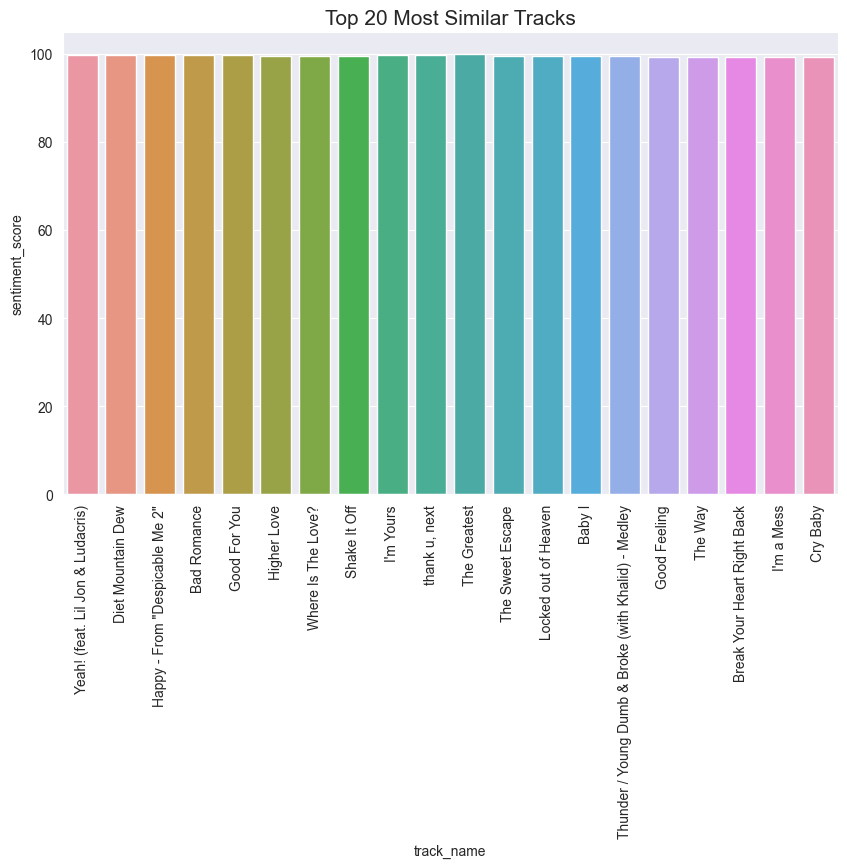

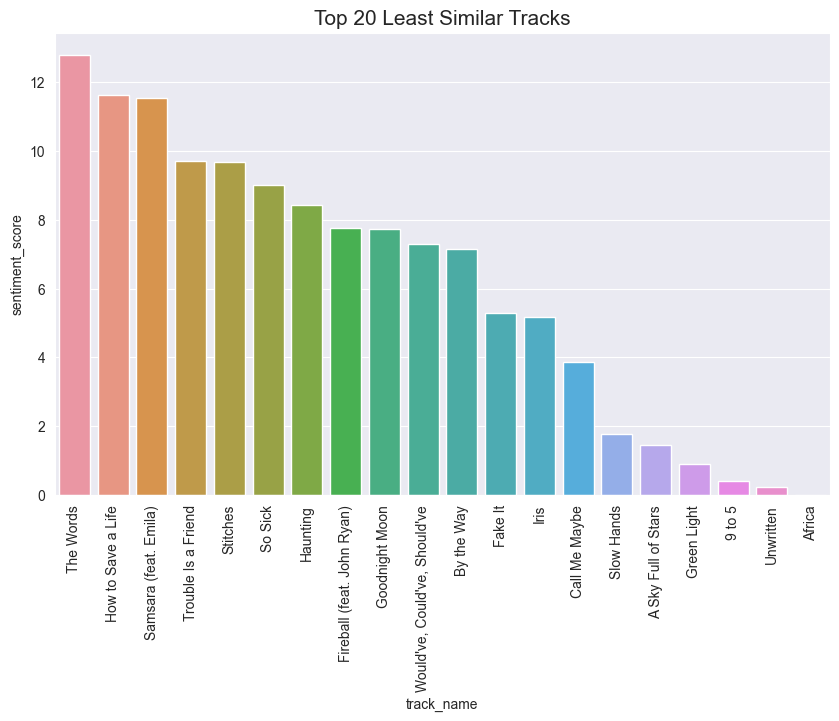

In [6]:
sentiment()
